# Plant Disease Prediction

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 71235 files belonging to 45 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18364 files belonging to 45 classes.


## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=45,activation='softmax'))

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=25)

Epoch 1/25
2227/2227 [==============================] - 178s 77ms/step - loss: 1.4024 - accuracy: 0.5955 - val_loss: 0.5519 - val_accuracy: 0.8258
Epoch 2/25
2227/2227 [==============================] - 182s 82ms/step - loss: 0.4614 - accuracy: 0.8555 - val_loss: 0.2956 - val_accuracy: 0.9055
Epoch 3/25
2227/2227 [==============================] - 180s 81ms/step - loss: 0.2718 - accuracy: 0.9123 - val_loss: 0.2649 - val_accuracy: 0.9161
Epoch 4/25
2227/2227 [==============================] - 176s 79ms/step - loss: 0.1951 - accuracy: 0.9360 - val_loss: 0.1662 - val_accuracy: 0.9460
Epoch 5/25
2227/2227 [==============================] - 176s 79ms/step - loss: 0.1408 - accuracy: 0.9529 - val_loss: 0.2257 - val_accuracy: 0.9322
Epoch 6/25
2227/2227 [==============================] - 181s 81ms/step - loss: 0.1125 - accuracy: 0.9635 - val_loss: 0.1427 - val_accuracy: 0.9555
Epoch 7/25
2227/2227 [==============================] - 177s 79ms/step - loss: 0.0927 - accuracy: 0.9697 - val_loss: 0

# Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2227/2227 [==============================] - 48s 21ms/step - loss: 0.0159 - accuracy: 0.9951
Training accuracy: 0.995100736618042


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

574/574 [==============================] - 14s 23ms/step - loss: 0.0931 - accuracy: 0.9741
Validation accuracy: 0.9740797281265259


## Saving Model

In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history #Return Dictionary of history

{'loss': [1.402435302734375,
  0.46138671040534973,
  0.27175456285476685,
  0.19505412876605988,
  0.14078828692436218,
  0.11249999701976776,
  0.09268434345722198,
  0.07613655924797058,
  0.06426417827606201,
  0.06001601368188858,
  0.05482611060142517,
  0.04645363613963127,
  0.04451586306095123,
  0.039401087909936905,
  0.03717555105686188,
  0.03380623087286949,
  0.0320877805352211,
  0.029921269044280052,
  0.029562292620539665,
  0.028222527354955673,
  0.0269025806337595,
  0.0221816785633564,
  0.025861181318759918,
  0.024351542815566063,
  0.023048624396324158],
 'accuracy': [0.5955499410629272,
  0.8555344939231873,
  0.9122622013092041,
  0.9359865188598633,
  0.9528602361679077,
  0.9635010957717896,
  0.9696918725967407,
  0.974773645401001,
  0.9786761999130249,
  0.9812451601028442,
  0.9825928211212158,
  0.9853021502494812,
  0.9860461950302124,
  0.9870849847793579,
  0.9877728819847107,
  0.9898364543914795,
  0.9898364543914795,
  0.9906085729598999,
  0.990

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Accuracy Visualization

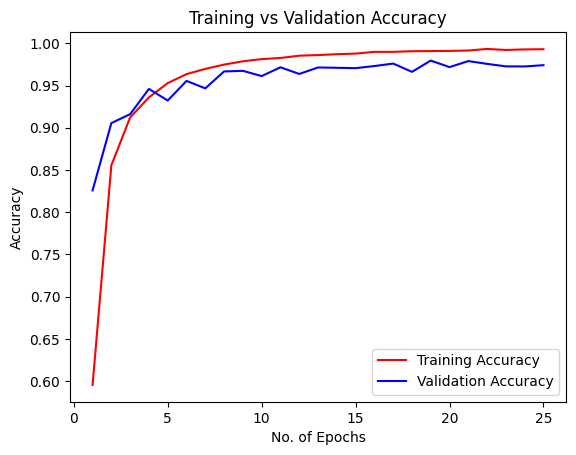

In [24]:
import matplotlib.pyplot as plt

epochs = range(1, len(training_history.history['accuracy']) + 1)

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


# Some other metrics for model evaluation

In [25]:
class_name = validation_set.class_names

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18364 files belonging to 45 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

18364/18364 [==============================] - 65s 3ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(18364,), dtype=int64, numpy=array([ 0,  0,  0, ..., 44, 44, 44], dtype=int64)>

In [30]:
predicted_categories

<tf.Tensor: shape=(18364,), dtype=int64, numpy=array([ 0,  0,  0, ..., 44, 44, 44], dtype=int64)>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.98      0.96       504
                                 Apple___Black_rot       0.99      1.00      1.00       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.96      0.97      0.97       502
                               Blueberry___healthy       0.97      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.92      0.95       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.98      0.

## Confusion Matrix Visualization

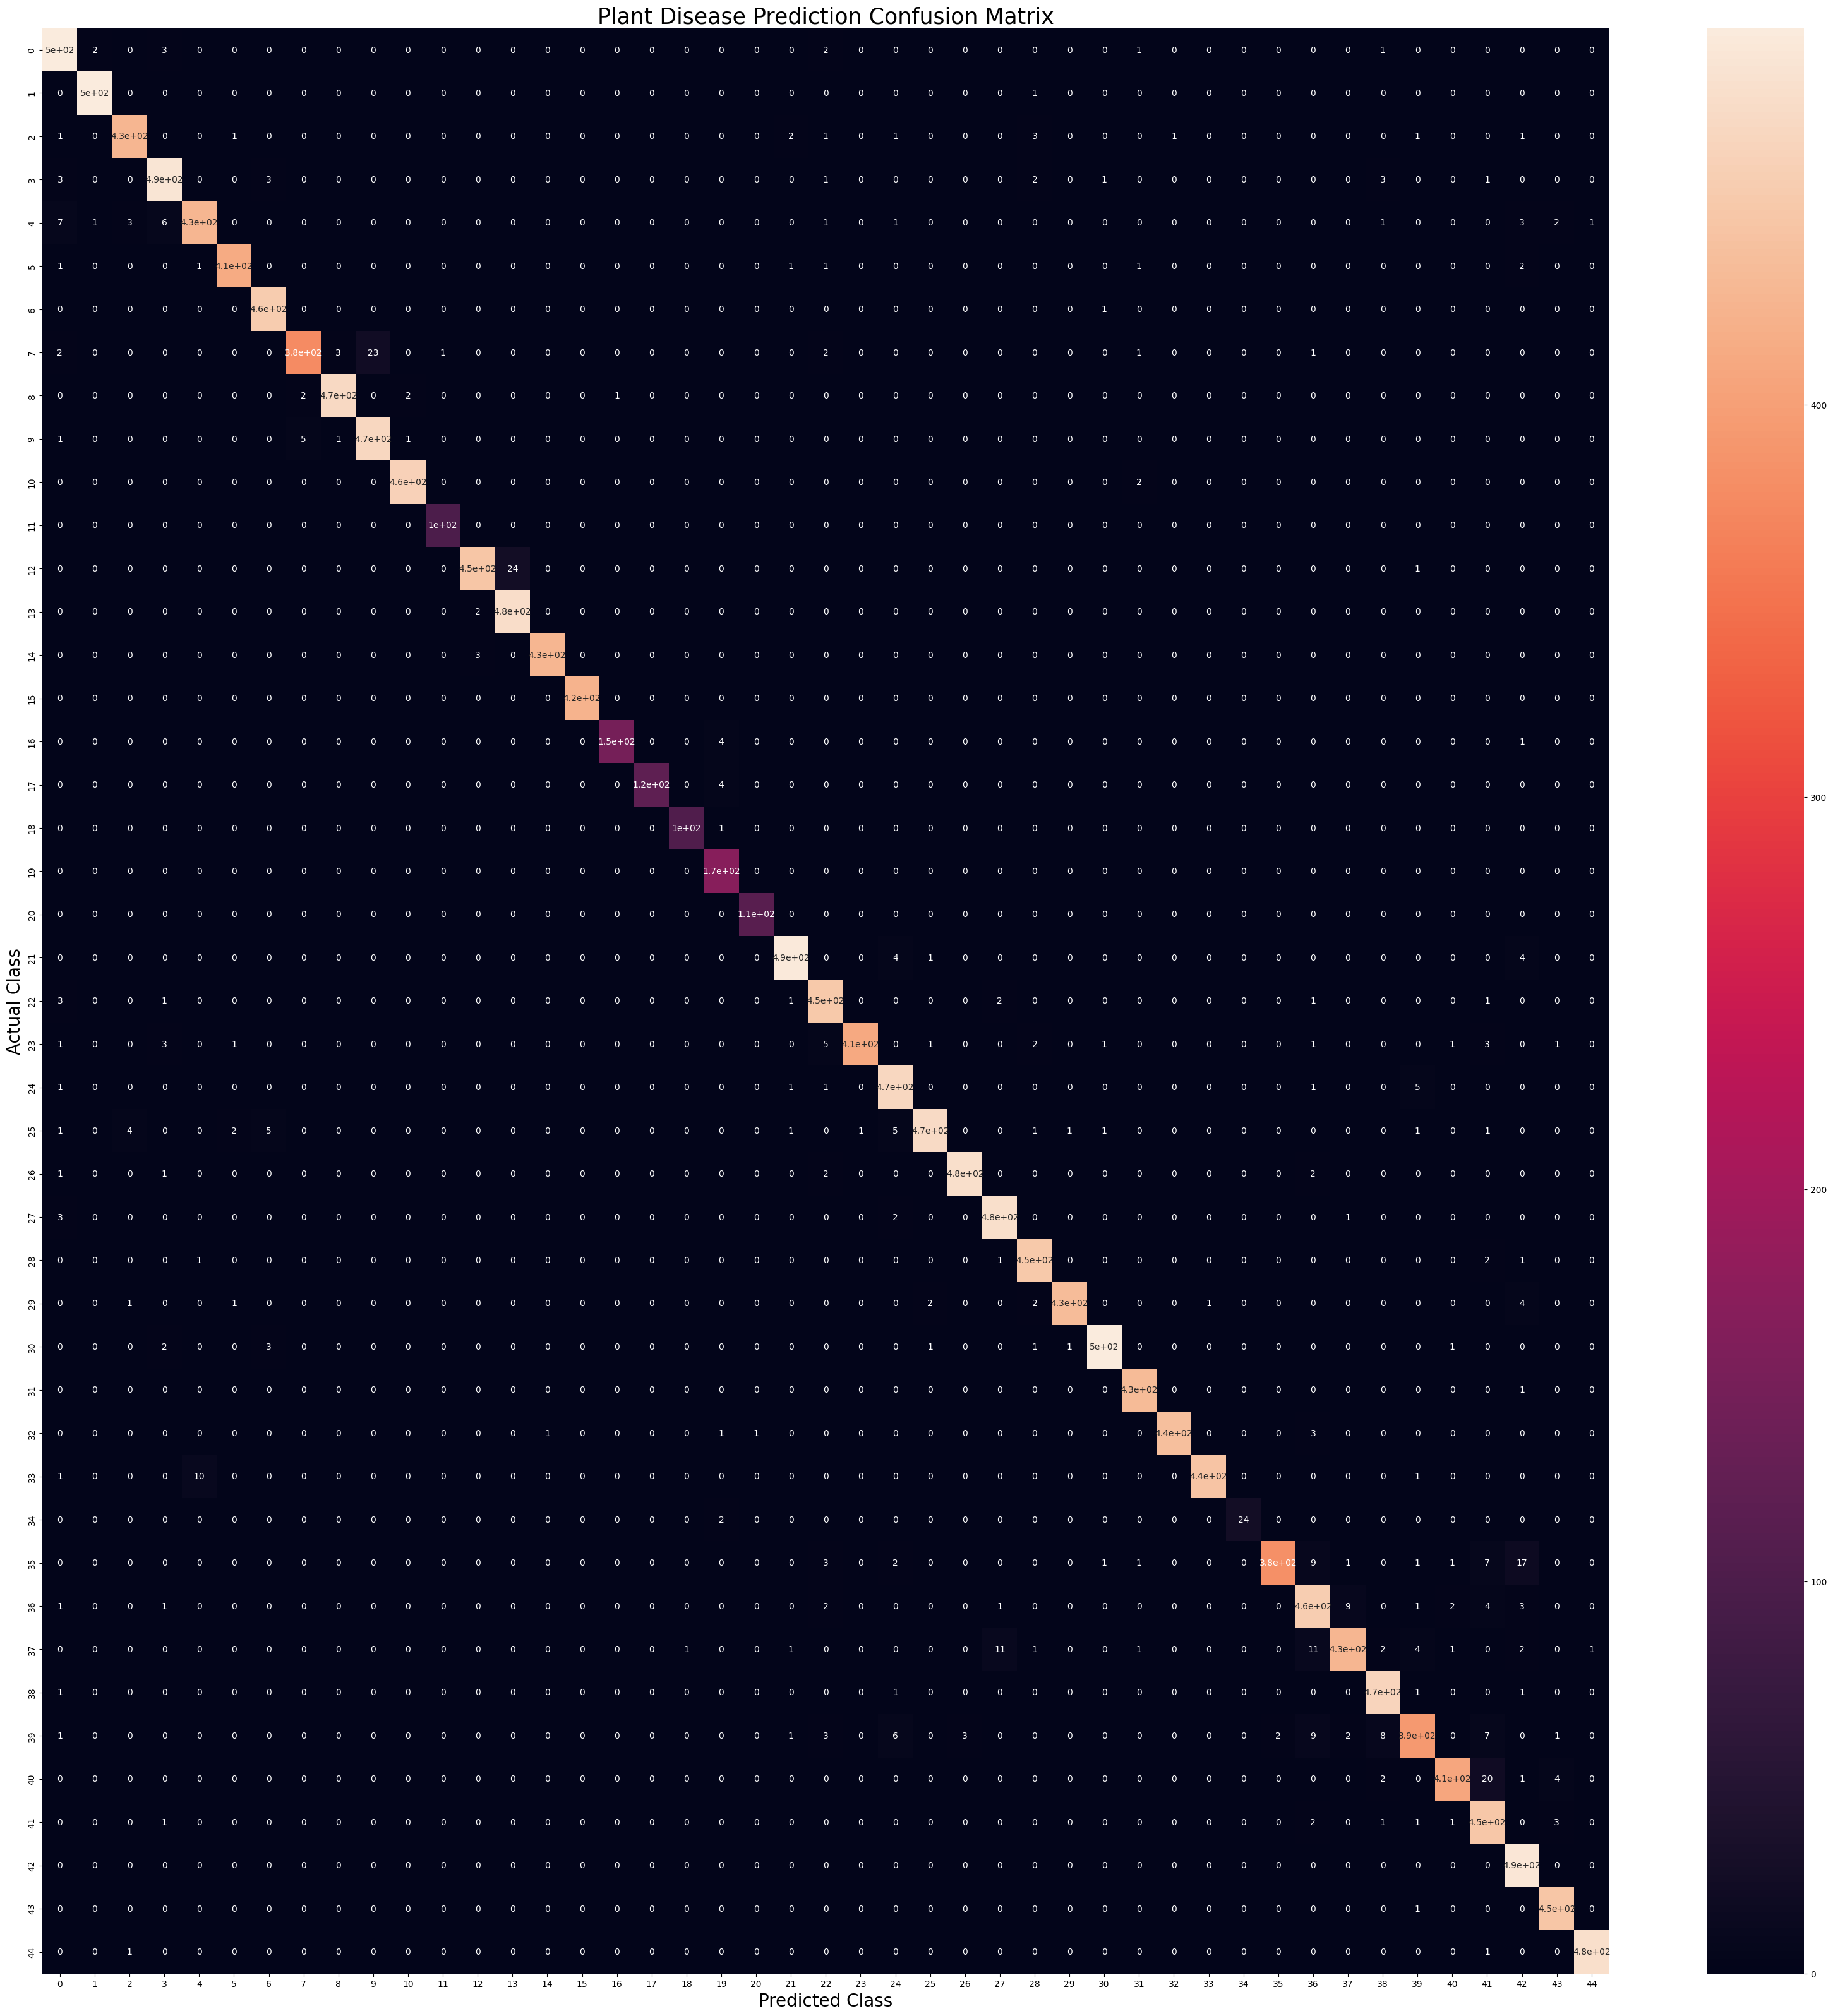

In [33]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [34]:
cnn.save('trained_plant_disease_model.h5')

In [35]:
model = tf.keras.models.load_model('trained_plant_disease_model.keras')


In [36]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmphv3wya2p\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmphv3wya2p\assets


In [37]:
with open('plant_disease_model.tflite', 'wb') as f:
    f.write(tflite_model)
